In [4]:
import pandas as pd

url = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url, compression = 'zip')

In [5]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Conforme nossa busca na [documentação do Pandas](https://pandas.pydata.org), encontramos uma maneira para construir uma tabela de frequências, a função ```crosstab```. Esta função recebe como argumentos os dados que gostaríamos de correlacionar de uma maneira bem simples: ```crosstab(dataframe['coluna1'], dataframe['coluna2'])``` e então, como retorno, temos uma matriz que relaciona essas variáveis a partir da frequência.

Podemos ver que as categorias da variável ```dose``` transformaram-se em linhas e as categorias da variável ```tempo``` são colunas.

In [6]:
pd.crosstab(dados['dose'], dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


Entretanto, na matriz acima não estamos considerando o tratamento usado, apesar desta variável ser de suma importância, visto que, decide se há ou não presença de um composto no evento.
Por isso, vamos construir uma nova tabela com o ```crosstab``` considerando essa nova variável.

Para isso, usaremos a mesma sintaxe anterior, adicionando ```dados['tratamento']```ao final e, adicionalmente, deixamos as duas primeiras colunas declaradas entre colchetes, pois assim garantimos que suas informações estarão distribuídas nas linhas, ou seja, o código final para este comando será: ```crosstab(dataframe[['coluna1'], dataframe['coluna2']], dataframe['coluna3'])```.

O resultado será uma tabela de frequências multi-index (mais de um índice) sendo que o index da esquerda se refere aos dados da variável ```dose``` e o index da direita são as informações de ```tempo```, respeitando a ordem na qual declaramos as respectivas variáveis.

In [7]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Apesar de já termos construído uma tabela bem interessante através da frequência de algumas variáveis, podemos explorar a proporção destes dados entre si. 

Para fazer isso vamos, novamente, copiar o nosso comando acrescentando um novo parâmetro ao final, o ```normalize```. Então o código ficará: ```crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index')```. Esse parâmetro normaliza a nossa tabela e escolhemos que ela faça isso a partir do índice, ou seja, ela fará a comparação entre as categorias, isto é, a soma de cada linha será igual a 1.
Fazer este tipo de análise possibilita que façamos algumas suposições acerca do balanceamento entre as categorias e, analisando a nossa matriz, podemos concluir que há proporcionalidade na nossa base de dados.


In [9]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Podemos também agregar à nossa matriz uma métrica estatística associada a uma coluna. 
Para que isso seja cumprido, adicionamos mais dois parâmetros à nossa função ```crosstab```: o primeiro é o ```values = dataframe['variavel']``` e o segundo é o ```aggfunc``` que recebe como parâmetro alguma métrica estatística, como a média. Logo, ```aggfunc = 'mean'```. Isso quer dizer que queremos comparar entre as diferentes categorias (```com_controle``` e ```com_droga```) a média de valores associados a variável ```g-0```.

Aqui, podemos perceber algumas diferenças entre essas médias e podemos traçar algumas hipóteses a serem verificadas. Lembrando que a média de uma variável é uma conta feita a partir dos valores que aquela amostra apresenta e não é o valor que ela assume, de fato. Por isso, não podemos concluir nada somente olhando a média, mas entender seu comportamento nos dá indícios por quais caminhos podemos seguir.

In [11]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

Para variáveis contínuas, fazer tabelas de frequências não é a melhor estratégia para analisá-las, mas construir um novo tipo de gráfico pode ser muito interessante para o nosso processo. 

Então, para fins de visualização, o primeiro passo é filtrar a nossa base de dados com as colunas que queremos investigar.
No nosso caso, vamos analisar a relação entre as colunas ```g-0``` e ```g-3``` e, por isso, definimos uma lista de arrays com os nomes dessas colunas (```dataframe[['coluna1', 'coluna2']]```) e, como retorno, teremos nosso conjunto somente com as variáveis alvo.

In [12]:
dados[['g-0', 'g-3']]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


O ```scatterplot``` é um tipo de gráfico pré programado da biblioteca Seaborn e recebe como parâmetros a variável que vai ser usada no eixo x, a variável do eixo y e, por fim, o conjunto de dados. 

O código ficará: 

```sns.scatterplot(x = 'variavel para o eixo x', y = 'variavel para o eixo y', data = base de dados)```

E, como queremos investigar as variáveis ```g-0``` e ```g-3```, atribuímos cada uma delas a um eixo. 

O gráfico de dispersão utiliza os dados como uma coleção de pontos cartesianos e ele é usado para apurar se há relação de causa e efeito entre duas variáveis quantitativas. 

No nosso caso, cada linha será um par ordenado de acordo com o que declaramos no código, ou seja, o valor de ```g-0``` será a cordenada x e o valor de ```g-3``` será a coordenada y. 

Por exemplo: para a linha 0 da base de dados teremos (1,0620 , -0,6208) 

Mas, por outro lado, a partir do gráfico de dispersão, não podemos dizer que uma variável afeta a outra, podemos apenas definir se há relação entre elas e qual a é intensidade disso.

In [14]:
import seaborn as sns
sns.set()

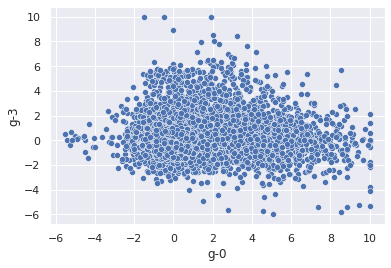

In [15]:
sns.scatterplot(x='g-0', y = 'g-3', data=dados)

Observando o gráfico que construímos acima, não parecemos encontrar nenhum padrão tão definido. Então, vamos confrontar mais duas colunas para verificar se encontramos algum padrão melhor definido.

Aqui, vamos usar a variável ```g-0``` para o eixo x e a variável ```g-8``` para o eixo y para construir o nosso novo gráfico.

Como retorno, recebemos um gráfico de dispersão onde a nuvem de pontos cartesianos parece desenhar melhor um padrão: conforme o ```g-0``` aumenta, o valor de ```g-8``` diminui. Aparentemente, a relação entre essas duas variáveis desenha uma curva com inclinação negativa.

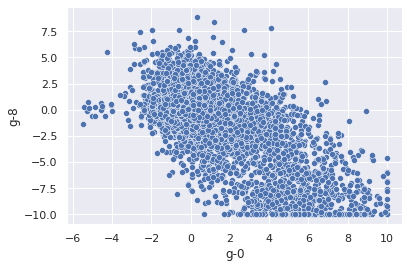

In [16]:
sns.scatterplot(x='g-0', y = 'g-8', data=dados)

E, como parte do nosso trabalho é levantar hipóteses e confirmá-las (ou não), precisamos verificar se a nossa suspeita de que a relação entre as variáveis ```g-0``` e ```g-8```desenha uma curva com inclinação negativa. 

Para isso, vamos utilizar uma outra função do Seaborn, a ```lmplot```. A ```lmplot``` vai desenhar no nosso gráfico de dispersão uma linha de tendência e, assim, poderemos confirmar o padrão daquele conjunto de dados.

Os parâmetros a serem recebidos são muito parecidos com aqueles usados no ```scatterplot```. Então teremos:

```sns.lmplot(data=base de dados, x='variavel para o eixo x', y='variavel para o eixo y', line_kws={'color': 'cor da linha de tendencia'})```

Utilizamos o parâmetro ```line_kws = {'color': 'red'}``` para criar um bom contraste entre os pontos do gráfico de dispersão e a linha de tendência.

Observando o nosso gráfico, podemos concluir a nossa hipótese inicial, mas ele ainda não é suficiente para finalizarmos a nossa análise.



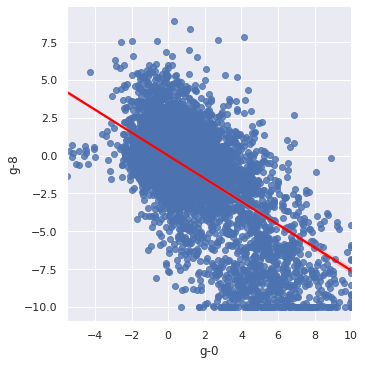

In [17]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'})

Para uma análise mais real e completa, é interessante que separemos ainda mais o nosso conjunto de dados. Isso porque, na imagem acima, apesar de termos uma linha de tendência para a relação entre os dados ```g-0``` e ```g-8```, não há filtros para a dosagem, o tratamento e o tempo. E, pesando em drug discorevy, é extremamente importante que façamos a separação desses conjuntos.

Então, vamos acrescentar mais alguns parâmetros para executar a separação. Acrescentamos o parâmetro ```col = tratamento``` para que sejam plotados gráficos de acordo com as categorias da variável em questão nas colunas (```com_droga``` e ```com_controle```), também incluímos o parâmetro ```row = 'tempo'``` para que mais uma subdivisão seja feita e as linhas apresentem novos gráficos com as diferentes categorias (```24```,```48``` e ```72```).

Assim, podemos perceber as nuances de cada gráfico e o comportamento de determinado subconjunto.

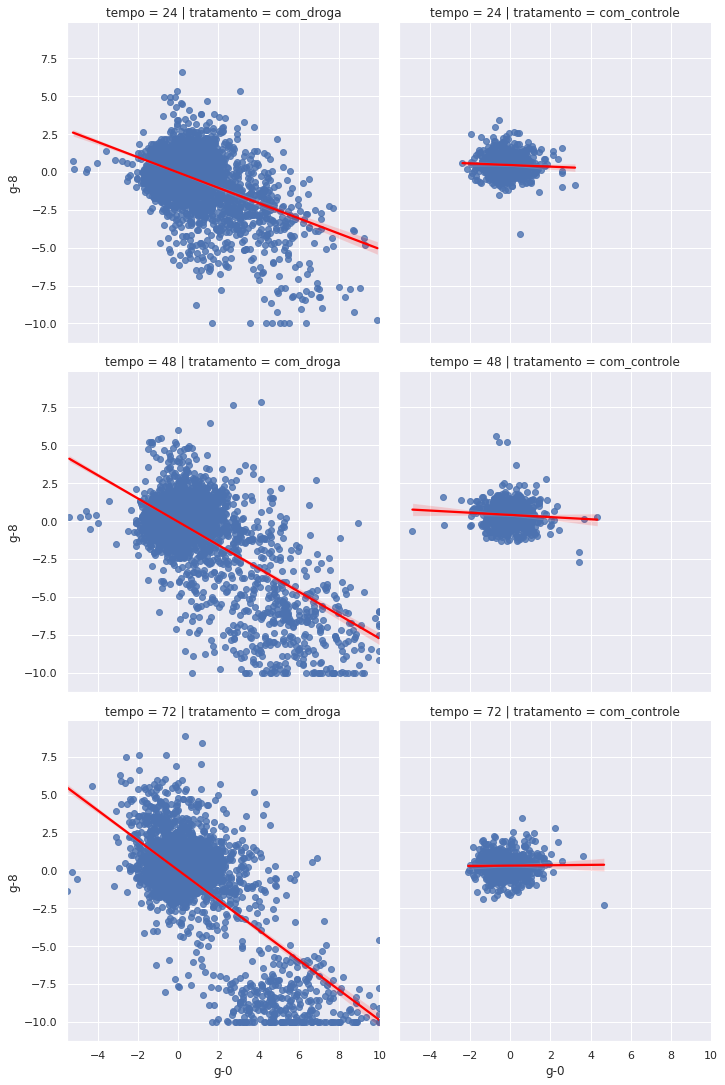

In [18]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento', row='tempo')

Outra medida para analisar como as variáveis estão associadas é a correlação. 

Para isso, vamos usar uma função já conhecida do Pandas, o ```loc``` e, vamos agregar o ```.corr```. O ```loc``` serve para definirmos o intervalo em que a correlação vai ser calculada. Aqui, estamos calculando a correlação entre todos os genes. 

Como retorno, temos uma tabela bem grande que correlaciona a variável e apresenta valores entre 1 e -1.
Por exemplo, o primeiro valor numérico apresentado na primeira linha é o resultado da correlação entre a variável que está nesta linha e nesta coluna, no nosso caso, o ```g-0``` em ambas as extremidades. No primeiro valor numérico apresentado na segunda linha, temos a correlação entre ```g-1``` e ```g-0``` e assim por diante. 

Mas, como interpretar esses valores? Bom, temos a seguinte divisão:
    
    - Valores muito próximos de 1 ou -1: variáveis altamente correlacionadas
    - Valores muito próximos de 0: variáveis pouco ou não correlacionadas

E o que diferencia se essa correlação será proporcional ou inversamente proporcional será o sinal. Quer dizer:

    - Valores muito próximos de 1: variáveis proporcionalmente correlacionadas
    - Valores muito próximos de -1: variáveis correlacionadas inversamente proporcionais

Agora que já sabemos como analisar essa tabela, podemos voltar para o nosso gráfico de dispersão construído com ```g-0``` e `g-8` e perceber que a nossa tabela confirma que ambas as variáveis estão correlacionadas e são inversamente proporcionais, visto que o valor apresentado na tabela é de -0,604212.

In [19]:
dados.loc[:,'g-0':'g-771'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

Analisar essa grande tabela é um desafio bem grande. Então, como auxílio visual, costumamos plotar um mapa de calor para que possamos identificar com maior facilidade a correlação entre as variáveis.

E, como esse código já está construído na própria documentação do Seaborn, vamos copiar o [código](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) de lá, fazendo apenas algumas pequenas alterações.

Então, de ```corr = d.corr()``` mudamos para ```corr = dados.loc[:,'g-0':'g-50'].corr()``` pois ajustamos o ```d``` para a nossa base de dados (```dados```) e decidimos incluir um ```loc``` para fazer o mapa de calor apenas do ```g-0``` ao ```g-50```. 
Também retiramos o parâmetro ```vmax=.3``` da última parte do código pois este era um limitador da correlação que não nos interessa no momento.

Adicionalmente, também fizemos a importação da biblioteca Numpy que é usada para gerar este mapa de calor (```import numpy as np```).





In [20]:
corr = dados.loc[:,'g-0':'g-50'].corr()

O mapa de calor mostra uma escala de cores em sua lateral direita, a legenda e, para cada pontinho, podemos perceber a força da correlação sendo mostrada através de uma cor associada.

Olhando para o nosso gráfico, percebemos que, em sua maioria, as expressões genicas não apresentam correlações tão altas entre si (podemos deduzir isso observando que o gráfico em grande parte é translúcido).

É importante destacar que não podemos inferir causalidade a partir da correlação, como já descrevemos anteriormente no gráfico de dispersão. 
Exemplificando: vimos que ```g-0``` e ```g-8``` têm correlação inversamente proporcional entre si mas não podemos concluir que é o ```g-0``` que faz o ```g-8``` diminuir, ou seja, a causa.



In [22]:
import matplotlib.pyplot as plt

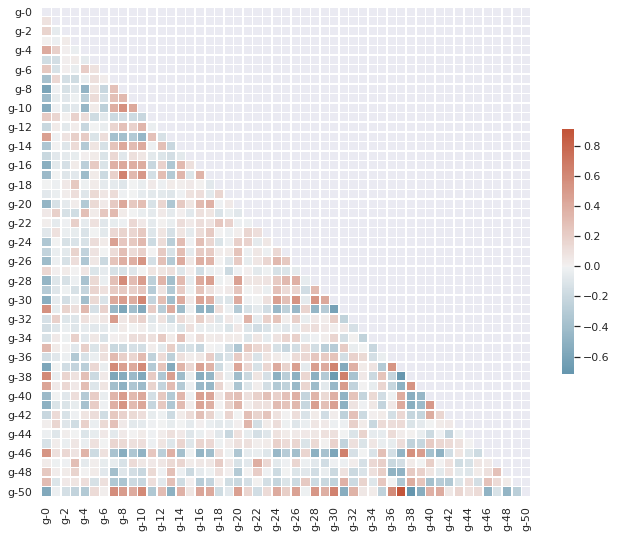

In [24]:
import numpy as np

# Gera uma 'máscara' para o triângulo superior:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configura o tamanho do gráfico
f, ax = plt.subplots(figsize=(11, 9))

# Gera um gráfico que tenha cores contrastantes para identificar a variação
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plota o mapa de calor com a máscara acima e a razão (ratio) correta
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Agora, vamos repetir o processo de construção do mapa de calor para a a viabilidade celular (```c```).

Definimos uma nova variável ```corr_celular``` e ajustamos os parâmetros de acordo com os nossos ```cs```.

Observando o gráfico de saída, podemos perceber uma grande diferença entre os dois mapas de calor que construímos. A escala deste novo gráfico é bem diferente da escala anterior, temos valores apenas entre 0,65 e 0,90, correlações altamente proporcionais.

In [25]:
corr_celular = dados.loc[:,'c-0':'c-50'].corr()

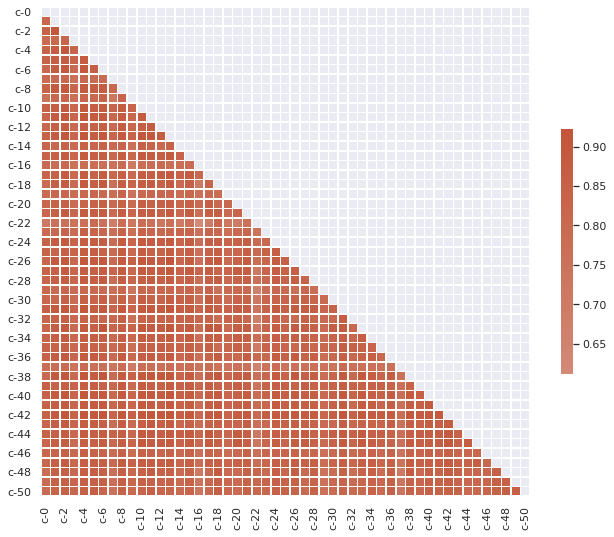

In [26]:
# Gera uma 'máscara' para o triângulo superior:
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Configura o tamanho do gráfico
f, ax = plt.subplots(figsize=(11, 9))

# Gera um gráfico que tenha cores para identificar a variação
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plota o mapa de calor com a máscara acima e a razão (ratio) correta
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Desafios

###Desafio 01:  Criar tabelas de frequência com pandas.groupby()

In [28]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [34]:
dados.groupby(by=['dose', 'tempo'])['tratamento'].value_counts()

dose  tempo  tratamento  
D1    24     com_droga       3585
             com_controle     301
      48     com_droga       4011
             com_controle     343
      72     com_droga       3600
             com_controle     307
D2    24     com_droga       3581
             com_controle     305
      48     com_droga       3591
             com_controle     305
      72     com_droga       3580
             com_controle     305
Name: tratamento, dtype: int64

In [39]:
dados.groupby(by=['droga', 'dose'])['tratamento'].value_counts()

droga      dose  tratamento
00199ff52  D1    com_droga     3
           D2    com_droga     3
00251fc41  D1    com_droga     3
           D2    com_droga     3
00321ea80  D1    com_droga     6
                              ..
ffe357f8f  D1    com_droga     1
ffed8e1c9  D1    com_droga     3
           D2    com_droga     3
fff7d208d  D1    com_droga     3
           D2    com_droga     3
Name: tratamento, Length: 6445, dtype: int64

###Desafio 02: Normalizar o crosstab pela coluna.

In [40]:
pd.crosstab([dados['dose'], dados['tempo']], dados ['tratamento'], normalize = 'columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

###Desafio 03: Explorar outros agregadores.

In [45]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='max') #máximo

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [47]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='min') #mínimo

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

In [48]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='count') #contagem

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [50]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='var') #variância

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.564594   2.137311
     48         0.728284   2.869308
     72         0.591814   2.127514
D2   24         0.699943   1.092022
     48         0.700310   1.730477
     72         0.770956   2.106944

In [49]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='std') #desvio padrão

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

###Desafio 04: Explorar o melt.

In [54]:
pd.melt(dados, id_vars=["dose"], value_vars=["tempo", "tratamento"])

,dose,variable,value
0,D1,tempo,24
1,D1,tempo,72
2,D1,tempo,48
3,D1,tempo,48
4,D2,tempo,72
...,...,...,...
47623,D2,tratamento,com_droga
47624,D2,tratamento,com_droga
47625,D2,tratamento,com_controle
47626,D1,tratamento,com_droga


###Desafio 05:  Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.

In [59]:
gene = dados.loc[:,'g-0':'g-50']
celula = dados.loc[:,'c-0':'c-50']
correlacao = pd.concat([gene, celula], axis=1)
corr = correlacao.corr().loc['c-0':'c-50','g-0':'g-50']
corr

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50
c-0,-0.624116,-0.037405,-0.168656,-0.037342,-0.403545,0.209358,-0.103316,0.486478,0.621422,0.435235,0.586035,-0.231425,0.345752,-0.455353,0.468143,0.041219,0.568077,0.511811,-0.032060,0.078310,0.443028,0.108853,0.085712,0.152211,0.456591,0.330978,0.496350,-0.177204,0.558456,0.367153,0.656611,-0.692572,0.211714,-0.084536,0.256107,-0.269916,0.145813,0.626157,-0.755459,-0.528145,0.585588,0.654305,0.226774,0.012347,-0.006908,0.210940,-0.633990,0.047621,-0.107011,-0.403137,0.611912
c-1,-0.624810,-0.030558,-0.178692,-0.093505,-0.379840,0.198890,-0.079528,0.553859,0.601678,0.475424,0.643461,-0.270409,0.361244,-0.483859,0.478114,0.056521,0.564153,0.509560,-0.071016,0.029949,0.368740,0.144788,0.078909,0.167012,0.478737,0.292106,0.508493,-0.158347,0.580010,0.383963,0.703746,-0.695461,0.277929,-0.036666,0.208706,-0.200159,0.282088,0.705889,-0.794085,-0.537176,0.544116,0.592208,0.181589,0.050491,0.000730,0.192941,-0.613219,0.033734,-0.187544,-0.337382,0.704723
c-2,-0.639789,-0.039616,-0.176733,-0.085298,-0.392841,0.211988,-0.078782,0.565002,0.597372,0.488331,0.640281,-0.276064,0.357949,-0.491421,0.484984,0.072825,0.587143,0.511541,-0.058010,0.041212,0.407185,0.125998,0.062507,0.160576,0.499975,0.304229,0.550255,-0.170310,0.580436,0.390478,0.722014,-0.708771,0.287357,-0.042537,0.231382,-0.243065,0.263756,0.720190,-0.819262,-0.562878,0.564072,0.617132,0.193366,0.039057,0.004341,0.206352,-0.634068,0.036176,-0.202502,-0.360132,0.716797
c-3,-0.604041,0.011899,-0.156894,-0.029079,-0.357850,0.193327,-0.093048,0.520284,0.564174,0.454065,0.587696,-0.232065,0.330601,-0.450723,0.475338,0.049883,0.555897,0.488323,-0.020933,0.076050,0.395583,0.123346,0.096140,0.172537,0.453716,0.295243,0.513194,-0.177194,0.507051,0.347568,0.646316,-0.672488,0.289150,-0.122636,0.270989,-0.253685,0.186842,0.655762,-0.763876,-0.527457,0.581430,0.574062,0.232262,0.029301,-0.037684,0.218353,-0.578463,0.087801,-0.154966,-0.396029,0.646285
c-4,-0.606231,-0.027014,-0.180127,-0.065964,-0.365118,0.206762,-0.055324,0.562647,0.545600,0.485965,0.622138,-0.260521,0.375820,-0.454998,0.491743,0.061464,0.573910,0.494453,-0.068624,0.015357,0.409882,0.147165,0.058114,0.168337,0.509640,0.304879,0.554534,-0.144067,0.553227,0.376674,0.707700,-0.694870,0.303024,-0.077581,0.303429,-0.237223,0.250828,0.706684,-0.818646,-0.549565,0.539012,0.589616,0.184286,0.032884,0.016416,0.213496,-0.618453,0.074328,-0.201262,-0.342652,0.709274
c-5,-0.629189,-0.004664,-0.170701,-0.054947,-0.384914,0.203880,-0.080601,0.537956,0.591920,0.460828,0.613657,-0.245630,0.368931,-0.461652,0.490987,0.031800,0.575351,0.508571,-0.075409,0.036808,0.418791,0.134489,0.037112,0.155087,0.496035,0.320317,0.535907,-0.178679,0.546589,0.395389,0.709453,-0.711380,0.291776,-0.083171,0.279156,-0.273290,0.220133,0.691303,-0.811158,-0.561923,0.573298,0.583448,0.200182,0.036772,0.006386,0.225782,-0.631966,0.042808,-0.142781,-0.392724,0.694375
c-6,-0.669697,-0.027941,-0.181008,-0.118651,-0.364633,0.192688,-0.077305,0.588667,0.607309,0.488941,0.650045,-0.282713,0.354224,-0.498800,0.455535,0.091079,0.570538,0.497299,-0.092479,0.019807,0.415082,0.142910,0.004070,0.162605,0.498251,0.277973,0.546202,-0.140555,0.576697,0.380113,0.718771,-0.698843,0.304389,-0.001378,0.225531,-0.252380,0.313368,0.751720,-0.825922,-0.555425,0.518075,0.595558,0.195119,0.058661,0.023676,0.189452,-0.622929,-0.008706,-0.271243,-0.368203,0.747266
c-7,-0.608954,-0.003155,-0.175473,-0.031232,-0.378776,0.175350,-0.095393,0.489653,0.579543,0.435394,0.574881,-0.184898,0.338342,-0.426301,0.459331,0.053212,0.542742,0.489527,-0.039252,0.052146,0.442555,0.093663,0.044714,0.143705,0.436155,0.336620,0.492387,-0.168127,0.529278,0.324712,0.643149,-0.647587,0.209278,-0.083817,0.243777,-0.280558,0.163984,0.626102,-0.740234,-0.510875,0.5544

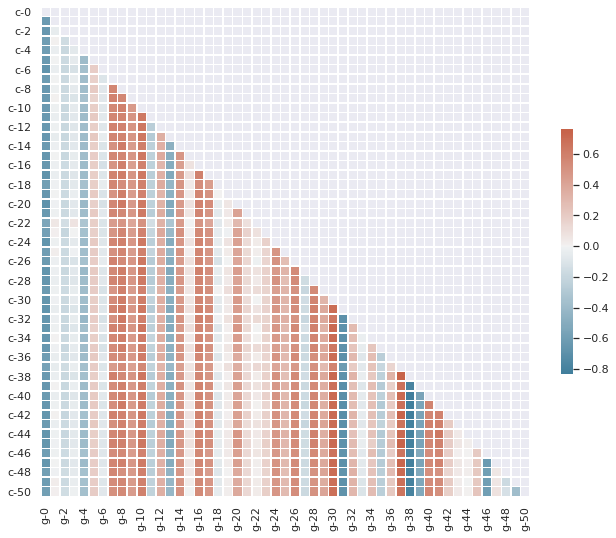

In [64]:
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

Resposta: A viabilidade celular correlacionada com os genes g-0, g-13, g31, g-38 e g-46 é afetada negativamente.

###Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

In [ ]:
# corr = dados.loc[:,'g-0':'g-50'].corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(11, 9))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

Resposta: 
De acordo com o código acima, já tendo a biblioteca Numpy importada, precisamos fazer:
1. A correlação com as colunas g-0 até g-50; 
2. Em seguida é feito uma mask para deixar somente a parte de baixo da matriz (em formato de triângulo). A parte de cima teria os mesmos valores e ocuparia espaço desnecessário na memória | O np.ones_like é definido como um boleano; 
3. A  função .subplots definirá o tamanho do gráfico que vai ser plotado;
4. A função .diverging_palette definirá as cores e saturações para gráfico;
5. A função .heatmap retorna o gráfico plotado.

###Desafio 07: Resumo do que você aprendeu 

Resposta:
1. Construção de tabela de frequência com o `.groupby()` e `.crosstabs()`, possibilidade de adição de métrica estatística dentro desta função usando o `aggfunc`. 
2. Plotagem do gráfico `.scatterplot()`, que recebe como parâmetros a variável que vai ser usada no eixo x, a variável do eixo y e, por fim, o conjunto de dados. 
* Desenho da linha de tendência usando a função `lmplot` (biblioteca Seaborn). 
3. Função `.loc` agregada do `.corr` para definir o intervalo e depois a correlação entre os dados. Os resultados irão variar entre -1 e 1 e significam:
- Valores muito próximos de 1 ou -1: variáveis altamente correlacionadas, proporcionalmente (+) ou inversamente (-)
- Valores muito próximos de 0: variáveis pouco ou não correlacionadas
4. Plotagem do mapa de calor e suas configurações (mask, tamanho, cores, proporção)
